In [1]:
!pip install -q ultralytics roboflow opencv-python matplotlib scikit-learn numpy tqdm

from ultralytics import YOLO
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

print(" Setup completed successfully")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
 Setup completed successfully


In [2]:
!ls /content/drive/MyDrive


'23951A66B2 AAT-2 Assignments'
 2550.pdf
'AAT2 SEM5 CEPS'
 apsrtc.
'Colab Notebooks'
 Crowd_Anomaly_Project
 datasets
 eclipse-jee-2022-06-R-win32-x86_64.zip
'landscape template.dwg'
 ppt.rar
'Resume navya.pdf'
'STAY SAFE WOMEN SECURITY APPLICATION AIML.pptx'


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler


In [4]:
import os

BASE_PATH = "/content/drive/MyDrive/Crowd_Anomaly_Project"
os.makedirs(BASE_PATH, exist_ok=True)

paths = [
    "videos",
    "frames",
    "results",
    "models"
]

for p in paths:
    os.makedirs(os.path.join(BASE_PATH, p), exist_ok=True)

print("Project folders created successfully")


Project folders created successfully


<IPython.core.display.Javascript object>

✅ Laptop camera image captured successfully


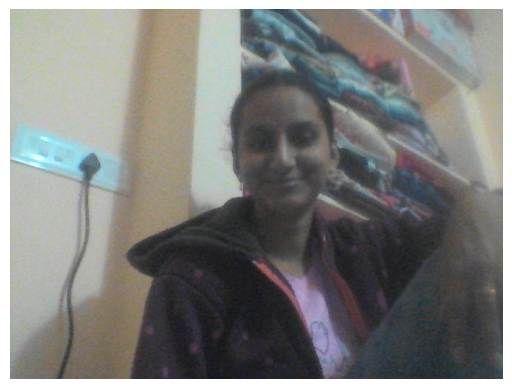

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import matplotlib.pyplot as plt

display(Javascript('''
async function capture() {
  const div = document.createElement('div');
  const video = document.createElement('video');
  const stream = await navigator.mediaDevices.getUserMedia({ video: true });

  document.body.appendChild(div);
  div.appendChild(video);
  video.srcObject = stream;
  await video.play();

  await new Promise(resolve => setTimeout(resolve, 2000));

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);

  stream.getTracks().forEach(track => track.stop());
  div.remove();

  return canvas.toDataURL('image/jpeg', 0.8);
}
'''))

# Call JS function
image_data = eval_js('capture()')
image_bytes = b64decode(image_data.split(',')[1])

# Save image
image_path = f"{BASE_PATH}/results/test_camera.jpg"
with open(image_path, "wb") as f:
    f.write(image_bytes)

# Display image
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

print("✅ Laptop camera image captured successfully")


In [6]:
from ultralytics import YOLO

yolo_model = YOLO("yolov8n.pt")

def estimate_density(frame):
    """
    Input : Frame (live camera / dataset frame)
    Output: People count and bounding boxes
    """
    results = yolo_model(frame, conf=0.3, classes=[0])

    boxes = []
    for r in results:
        for box in r.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            boxes.append((x1, y1, x2-x1, y2-y1))

    return len(boxes), boxes


<IPython.core.display.Javascript object>


0: 480x640 1 person, 80.0ms
Speed: 2.9ms preprocess, 80.0ms inference, 107.4ms postprocess per image at shape (1, 3, 480, 640)


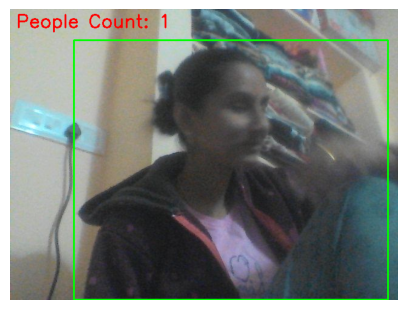

<IPython.core.display.Javascript object>


0: 480x640 (no detections), 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


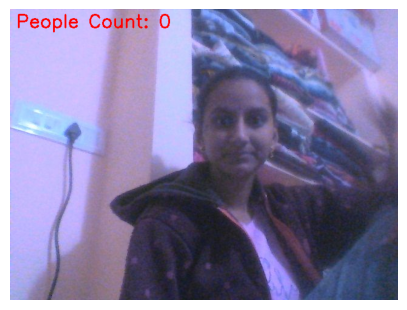

<IPython.core.display.Javascript object>


0: 480x640 1 person, 11.3ms
Speed: 2.7ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


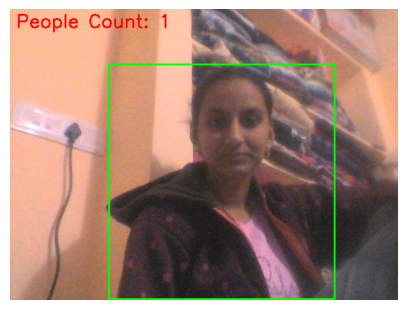

<IPython.core.display.Javascript object>


0: 480x640 (no detections), 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


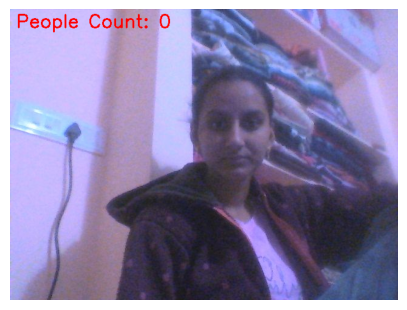

<IPython.core.display.Javascript object>


0: 480x640 1 person, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


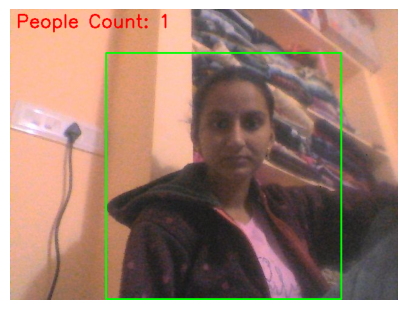

<IPython.core.display.Javascript object>


0: 480x640 1 person, 11.7ms
Speed: 4.2ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


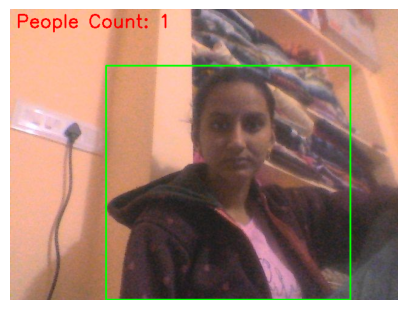

<IPython.core.display.Javascript object>


0: 480x640 1 person, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


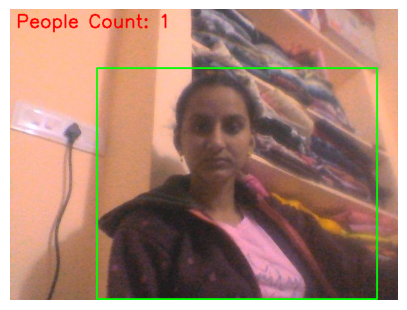

<IPython.core.display.Javascript object>


0: 480x640 1 person, 53.7ms
Speed: 16.8ms preprocess, 53.7ms inference, 10.4ms postprocess per image at shape (1, 3, 480, 640)


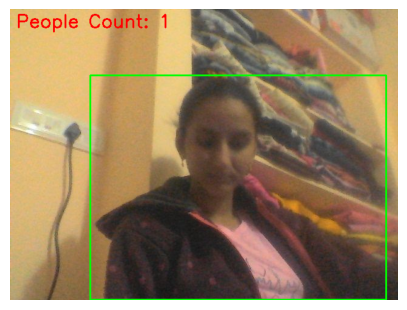

<IPython.core.display.Javascript object>


0: 480x640 1 person, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


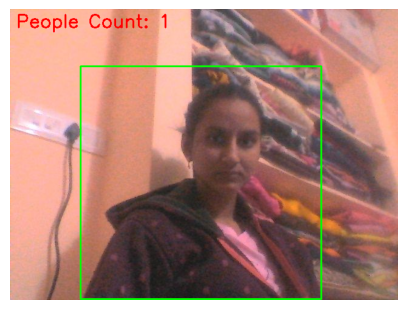

<IPython.core.display.Javascript object>


0: 480x640 1 person, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


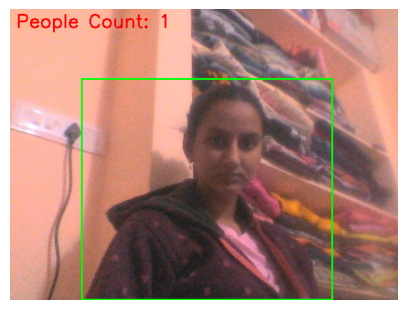

Crowd density values collected from live dataset: [1, 0, 1, 0, 1, 1, 1, 1, 1, 1]


In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time

density_list = []
num_frames = 10

for i in range(num_frames):
    display(Javascript('''
    async function capture() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => setTimeout(resolve, 500));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    '''))

    img_data = eval_js('capture()')
    img_bytes = b64decode(img_data.split(',')[1])

    # Decode image
    frame = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)

    count, boxes = estimate_density(frame)
    density_list.append(count)

    # Draw boxes
    for (x, y, w, h) in boxes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)

    cv2.putText(frame, f"People Count: {count}", (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    plt.figure(figsize=(5,4))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

print("Crowd density values collected from live dataset:", density_list)


In [8]:
def detect_stampede_risk(density_list, density_threshold=6, spike_threshold=3):
    """
    density_list       : List of people counts over time
    density_threshold  : Maximum safe crowd limit
    spike_threshold    : Sudden increase threshold
    """
    if len(density_list) < 2:
        return "INSUFFICIENT DATA"

    max_density = max(density_list)
    sudden_spike = any(
        abs(density_list[i] - density_list[i-1]) >= spike_threshold
        for i in range(1, len(density_list))
    )

    if max_density >= density_threshold or sudden_spike:
        return "HIGH STAMPEDE RISK"
    else:
        return "NORMAL CROWD"

risk_status = detect_stampede_risk(density_list)
print("🚨 Stampede Risk Status:", risk_status)


🚨 Stampede Risk Status: NORMAL CROWD


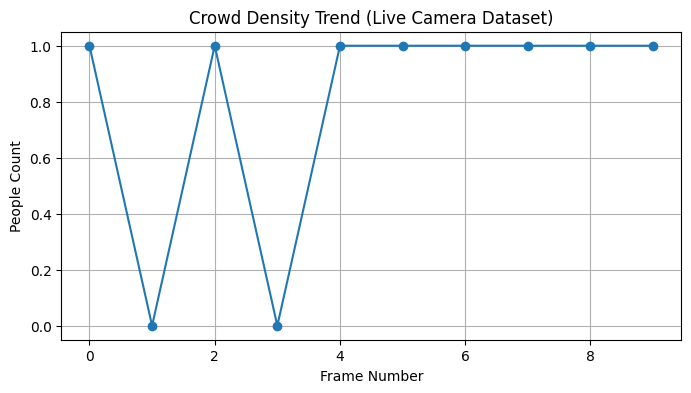

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(density_list, marker='o')
plt.xlabel("Frame Number")
plt.ylabel("People Count")
plt.title("Crowd Density Trend (Live Camera Dataset)")
plt.grid(True)
plt.show()


In [10]:
print("========== RESULT SUMMARY ==========")
print("Dataset Used           : Live Camera Dataset")
print("People Count per Frame :", density_list)
print("Maximum Crowd Detected :", max(density_list))
print("Stampede Risk Status   :", risk_status)
print("====================================")


========== RESULT SUMMARY ==========
Dataset Used           : Live Camera Dataset
People Count per Frame : [1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Maximum Crowd Detected : 1
Stampede Risk Status   : NORMAL CROWD


In [11]:
import pickle
import os
import json
from datetime import datetime

# 🔐 Always re-define BASE_PATH (prevents NameError)
BASE_PATH = "/content/drive/MyDrive/Crowd_Anomaly_Project"

SAVE_PATH = os.path.join(BASE_PATH, "saved_state")
os.makedirs(SAVE_PATH, exist_ok=True)

# 1️⃣ Save density list
with open(os.path.join(SAVE_PATH, "density_list.pkl"), "wb") as f:
    pickle.dump(density_list, f)

# 2️⃣ Save risk status
with open(os.path.join(SAVE_PATH, "risk_status.txt"), "w") as f:
    f.write(risk_status)

# 3️⃣ Save summary JSON
summary = {
    "timestamp": str(datetime.now()),
    "dataset": "Live Camera Dataset",
    "density_list": density_list,
    "max_density": max(density_list),
    "risk_status": risk_status
}

with open(os.path.join(SAVE_PATH, "summary.json"), "w") as f:
    json.dump(summary, f, indent=4)

print(" Crowd anomaly state saved successfully to Google Drive")


 Crowd anomaly state saved successfully to Google Drive


In [12]:
!ls /content/drive/MyDrive/Crowd_Anomaly_Project/saved_state


density_list.pkl  risk_status.txt  summary.json


In [13]:
ABNORMAL_CLASSES = [
    "backpack",
    "handbag",
    "suitcase",
    "knife",
    "scissors",
    "sports ball"
]

print("Abnormal object classes defined")


Abnormal object classes defined


In [14]:
def detect_abnormal_objects(frame, conf_threshold=0.25):
    results = abnormal_model(frame, conf=conf_threshold)

    abnormal_detections = []
    debug_detections = []

    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls[0])
            cls_name = abnormal_model.names[cls_id]
            confidence = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            debug_detections.append((cls_name, confidence, (x1,y1,x2,y2)))


            if cls_name in ABNORMAL_CLASSES:
                abnormal_detections.append({
                    "class": cls_name,
                    "confidence": confidence,
                    "bbox": (x1, y1, x2, y2)
                })

    return abnormal_detections, debug_detections


In [15]:
def weapon_risk_behavior(person_boxes, density):
    for (x,y,w,h) in person_boxes:
        if h > 150 and density > 5:
            return True
    return False


In [16]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import matplotlib.pyplot as plt

def capture_image_colab():
    display(Javascript("""
        async function capture() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            await new Promise(resolve => setTimeout(resolve, 2000));
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg');
        }
        capture();
    """))
    data = eval_js("capture()")
    binary = b64decode(data.split(',')[1])
    img = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
    return img


In [17]:
!pip install -q ultralytics roboflow opencv-python matplotlib


In [18]:
from roboflow import Roboflow

rf = Roboflow(api_key="e5iUEbNNU7ztKaKE2t36")
print("Roboflow connected successfully")

Roboflow connected successfully


In [19]:
!pip install -q roboflow
from roboflow import Roboflow


In [20]:
rf = Roboflow(api_key="e5iUEbNNU7ztKaKE2t36")

project = rf.workspace("ahad-liwdw").project("weapon-detection-twbhu")

dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weapon-Detection-1 in yolov8:: 100%|██████████| 2736/2736 [00:00<00:00, 3120.50it/s]


In [21]:
import os

!ls /content/Weapon-Detection-1
!cat /content/Weapon-Detection-1/data.yaml


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
names:
- Grenade
- Gun
- Knife
- Pistol
nc: 4
roboflow:
  license: CC BY 4.0
  project: weapon-detection-twbhu
  url: https://universe.roboflow.com/ahad-liwdw/weapon-detection-twbhu/dataset/1
  version: 1
  workspace: ahad-liwdw
test: ../test/images
train: ../train/images
val: ../valid/images


In [22]:
import os

BASE_PATH = "/content/drive/MyDrive/Crowd_Anomaly_Project"
MODEL_PATH = os.path.join(BASE_PATH, "models")
RESULTS_PATH = os.path.join(BASE_PATH, "results")

os.makedirs(MODEL_PATH, exist_ok=True)
os.makedirs(RESULTS_PATH, exist_ok=True)

print(" Paths initialized")


 Paths initialized


In [23]:
from ultralytics import YOLO
weapon_model = YOLO("yolov8n.pt")
weapon_model.train(
    data="/content/Weapon-Detection-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    project="runs/detect",
    name="weapon_detection"
)


Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Weapon-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=weapon_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79dc6e33a420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [24]:
!ls /content


drive  runs  sample_data  Weapon-Detection-1  yolo26n.pt  yolov8n.pt


In [25]:
!ls /content/drive/MyDrive/Crowd_Anomaly_Project


frames	models	results  saved_state  videos


In [26]:
!ls /content/drive/MyDrive/Crowd_Anomaly_Project/models


best.pt  weapon_last.pt  weapon_webcam_detection.py  yolov8n-weapon.pt


In [28]:
!ls /content/weapon_tmp/weights


In [29]:
!cp /content/weapon_tmp/weights/best.pt \
/content/drive/MyDrive/Crowd_Anomaly_Project/models/yolov8n-weapon.pt


cp: cannot stat '/content/weapon_tmp/weights/best.pt': No such file or directory


In [30]:
!ls /content/drive/MyDrive/Crowd_Anomaly_Project/models


best.pt  weapon_last.pt  weapon_webcam_detection.py  yolov8n-weapon.pt


In [31]:
from ultralytics import YOLO

weapon_model = YOLO(
    "/content/drive/MyDrive/Crowd_Anomaly_Project/models/yolov8n-weapon.pt"
)

print("Weapon model loaded successfully")


Weapon model loaded successfully


In [32]:
results = weapon_model.predict(
    source="/content/Weapon-Detection-1/test/images",
    conf=0.4,
    save=True
)



image 1/204 /content/Weapon-Detection-1/test/images/00-main-military-tactical-weapons-and-poses-for-genesis-8-daz3d_1_jpg.rf.6b6664e7bf3ae74c5d0716a78b28f278.jpg: 640x640 3 Guns, 1 Knife, 7.5ms
image 2/204 /content/Weapon-Detection-1/test/images/00917d05-290_jpeg_jpg.rf.66499aed8cc96c0159c47867724b52e1.jpg: 640x640 1 Grenade, 7.2ms
image 3/204 /content/Weapon-Detection-1/test/images/03f690d9-275_jpeg_jpg.rf.3ad3d1a9735ee64dcfe5ba9afc6e3d15.jpg: 640x640 (no detections), 7.2ms
image 4/204 /content/Weapon-Detection-1/test/images/05c1802eb11a54118e4cbc09a9f98530_jpg.rf.0f979a424d0881129b3969eac9816d4f.jpg: 640x640 2 Grenades, 1 Gun, 1 Knife, 1 Pistol, 7.2ms
image 5/204 /content/Weapon-Detection-1/test/images/05f30416bfaa76b3deac16e455d69ebd_tn_jpg.rf.6dd19636a7fa8bdd664e4ae6ed716588.jpg: 640x640 1 Grenade, 1 Pistol, 7.2ms
image 6/204 /content/Weapon-Detection-1/test/images/06ed2465-92df6820c99d6e7506c88c3aeabfa673_jpg.rf.13e1c06aaf7846b76edb3f4342240745.jpg: 640x640 1 Gun, 7.2ms
image 7/2

In [33]:
!ls /content/drive/MyDrive/Crowd_Anomaly_Project/models/weapon_detection


ls: cannot access '/content/drive/MyDrive/Crowd_Anomaly_Project/models/weapon_detection': No such file or directory


In [ ]:
!pip install ultralytics


In [ ]:
!ls /content


sample_data


In [ ]:
!ls /content/Weapon-Detection-1


roboflow.zip


In [ ]:
!find /content/Weapon-Detection-1 -maxdepth 3 -type f


/content/Weapon-Detection-1/roboflow.zip


In [ ]:
!rm -rf /content/Weapon-Detection-1
!ls /content


drive  runs  sample_data  yolov8n.pt


In [ ]:
!pip install -q roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="e5iUEbNNU7ztKaKE2t36")

# This uses YOUR workspace automatically
project = rf.workspace().project("weapon-detection")

dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


RoboflowError: {
    "error": {
        "message": "Unsupported request. `GET /major-project-teezt/weapon-detection` does not exist or cannot be loaded due to missing permissions.",
        "type": "GraphMethodException",
        "hint": "You can see your active workspace by issuing a GET request to `/` with your `api_key`."
    }
}

In [ ]:
!pip install -q roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="YOUR_PRIVATE_API_KEY")

# This uses YOUR workspace automatically
project = rf.workspace().project("weapon-detection")

dataset = project.version(1).download("yolov8")


In [ ]:
!unzip /content/Weapon-Detection-1/roboflow.zip -d /content/Weapon-Detection-1


Archive:  /content/Weapon-Detection-1/roboflow.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Weapon-Detection-1/roboflow.zip or
        /content/Weapon-Detection-1/roboflow.zip.zip, and cannot find /content/Weapon-Detection-1/roboflow.zip.ZIP, period.


In [ ]:
!find /content/Weapon-Detection-1 -name data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data=dataset.location + "/data.yaml",
    epochs=20,
    imgsz=416,
    batch=8,
    device=cpu,
    workers=2,
    name="weapon_train"
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Weapon-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

RuntimeError: Dataset '/content/Weapon-Detection-1/data.yaml' error ❌ '/content/Weapon-Detection-1/data.yaml' does not exist

In [ ]:
!ls /content/runs/detect


ls: cannot access '/content/runs/detect': No such file or directory


In [ ]:
model.predict(
    source="/content/weapon-detection-1/test/images",
    conf=0.5,
    save=True
)


NameError: name 'model' is not defined

<IPython.core.display.Javascript object>


0: 480x640 1 person, 1 toothbrush, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Total detected objects: 2
Abnormal objects detected: 0


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

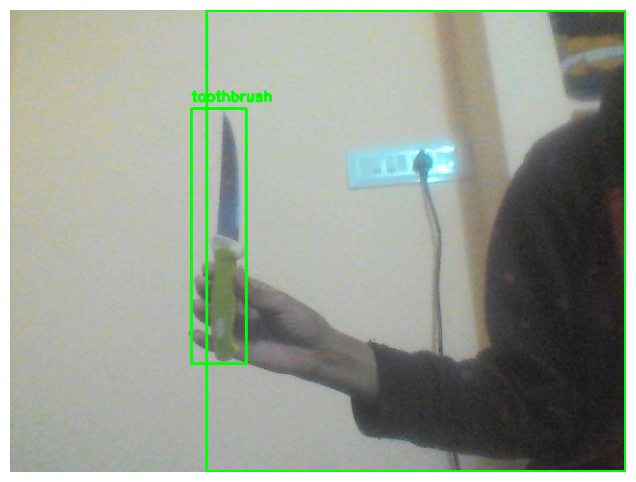

In [ ]:
frame = capture_image_colab()

abnormal_detections, debug_detections = detect_abnormal_objects(frame)

print("Total detected objects:", len(debug_detections))
print("Abnormal objects detected:", len(abnormal_detections))

for cls, conf, (x1,y1,x2,y2) in debug_detections:
    cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 255, 0), 2)
    cv2.putText(frame, f"{cls}", (x1, y1-8),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

for det in abnormal_detections:
    x1, y1, x2, y2 = det["bbox"]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
    cv2.putText(frame, f"ABNORMAL: {det['class']}",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 0, 255),
                2)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
